In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
def find(condition):
    res, = np.nonzero(np.ravel(condition))
    return res

In [40]:
#!/usr/bin/env python

####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity.					   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.					       #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################



beta=1.0
gamma=1/10.0
mu=5e-4
N0=100000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)+10
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((6))
	Change=np.zeros((6,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=min(find(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(3)]=V[range(3)]+Change[m,:]
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]

[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]




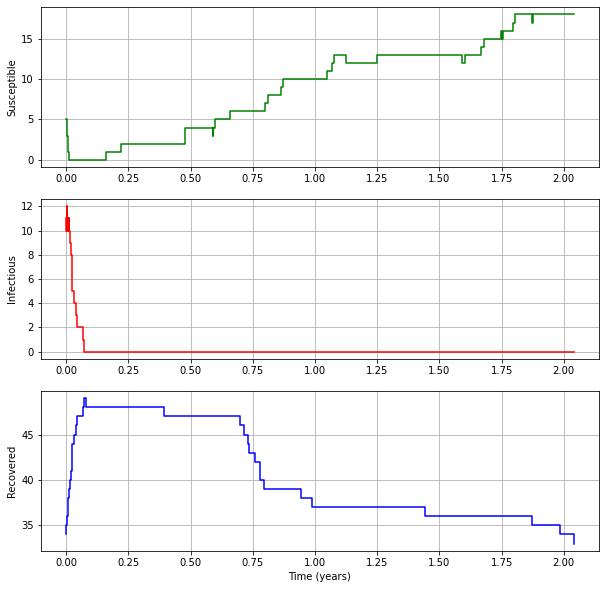

In [42]:
fig,ax=plt.subplots(3,1,figsize=(10,10))

ax[0].plot(tT, tS, 'g')
ax[0].set_ylabel ('Susceptible')


ax[1].plot(tT, tI, 'r')
ax[1].set_ylabel ('Infectious')

ax[2].plot(tT, tR, 'b')
ax[2].set_xlabel ('Time (years)')
ax[2].set_ylabel ('Recovered')

ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.savefig('q2_sir_N0=%i.pdf'%N0,bbox_inches='tight')
pl.show()

In [37]:
Y0

1.0

In [5]:
import numpy as np 
a=np.array([1,2,4,5,5,7,5,43])
find(a>2)

array([2, 3, 4, 5, 6, 7], dtype=int64)